In [7]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## Question 2

In [2]:
import calendar #Use the calendar package to give the number of days in any month for any year
days = calendar.monthrange(2018,6)[1] #Find number of days in June
seconds = days * 24 * 60 * 60 #Calculate the number of seconds based on the number of days
print('The number of seconds in June is', seconds) #Print the result

import datetime as dt #Use datetime package to assign a value to both given dates
date1 = dt.datetime(2018,6,1,12,0,0)
date2 = dt.datetime(2018,8,14,9,30,0)
tot_sec = (date2-date1).total_seconds(); #find the difference between the two dates and give results in seconds
print(tot_sec,'seconds have lapsed between 1 June, 1200 and 14 Aug, 0930')

The number of seconds in June is 2592000
6384600.0 seconds have lapsed between 1 June, 1200 and 14 Aug, 0930


In [9]:
pop_table = Table.read_table('world_population.csv').column('Population') #Import the data from the csv file
pop_2015 = pop_table.item(-1)
print(pop_2015) #print the most recent year that data exists

pop_1950 = pop_table.item(0) #Index the oldest cata value
tot_growth = pop_2015 - pop_1950 #Compute the difference in the first and last value in the dataset
print(tot_growth)

ave_growth = (tot_growth / pop_1950) / len(pop_table) #Compute and print the average growth rate over the length of the dataset
print(ave_growth)

7256490011
4698861357
0.02783628066338302


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,nan,C
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5,nan,S
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,nan,C
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,nan,C
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29,nan,S


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.45,nan,S
879,0,3,"Laleff, Mr. Kristo",male,nan,0,0,349217,7.8958,nan,S
869,0,3,"van Melkebeke, Mr. Philemon",male,nan,0,0,345777,9.5,nan,S
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,nan,8,2,CA. 2343,69.55,nan,S
860,0,3,"Razi, Mr. Raihed",male,nan,0,0,2629,7.2292,nan,C


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30,A23,S
852,0,3,"Svensson, Mr. Johan",male,74,0,0,347060,7.775,nan,S
494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,nan,C
97,0,1,"Goldschmidt, Mr. George B",male,71,0,0,PC 17754,34.6542,A5,C
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.75,nan,Q


Pclass,Survival Rates
1,0.152637
2,0.0976431
3,0.133558


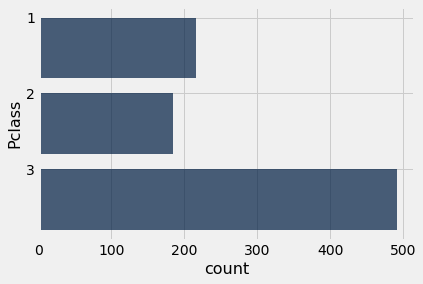

In [28]:
url = "https://raw.githubusercontent.com/oikobill/Kaggle/master/Titanic/data/train.csv"
titanic_table = Table.read_table(url)
    #Import the data from the given url
    
titanic_update1 = titanic_table.relabeled("Pclass","Passenger_class") #Update the column header

siblings = titanic_update1.column("SibSp")
relatives = titanic_update1.column("Parch")
count = siblings + relatives
titanic_update2 = titanic_update1.with_column("family_size",count) #Add a olumn with the combined family size

graph_table = titanic_table.group("Pclass") #Group the dataset by class
graph_table.barh("Pclass","count") #Print a barpolot of the result

young_titanic = titanic_table.sort("Age")
young_titanic.show(5) #Sort by age and show the first 5

old_titanic = titanic_table.sort("Age", descending = True)
old_titanic.show(5) #Sort oldest first and display the first 5

old_titanic2 = old_titanic.where("Age", are.above(0))
old_titanic2.show(5) #Adjust above data to remove NaN values

survivor_table = titanic_table.select("Survived", "Pclass") #Isolate the two columns of interest
survivor_update = survivor_table.group("Pclass", sum) #Total the passengers by class
tot_pass = len(titanic_table[0]) #Total all passengers
rates = survivor_update.column("Survived sum") / tot_pass #Calculate the survivalrates
rates_table = survivor_update.drop("Survived sum").with_column("Survival Rates", rates) #Update table to account for rates
rates_table